手写数字识别

In [3]:
import matplotlib.pyplot as plt   #画图库
from sklearn import datasets, metrics  #sklearn机器学习库
from sklearn.linear_model import LogisticRegression    #逻辑斯蒂回归库

In [9]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

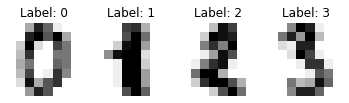

In [11]:
samples = list(zip(digits.images, digits.target))
for id, (img, label) in enumerate(samples[:4]):
    plt.subplot(1, 4, id + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')     #灰度图
    plt.title('Label: %i' % label)
plt.show()

In [13]:
#有n个图像
n = len(digits.images)
# convert 2D image to 1D feature（nx8x8->nx64），方便处理
data = digits.images.reshape(n, -1)

In [14]:
data.shape

(1797, 64)

#Build Logistic Regression Model

In [15]:
model = LogisticRegression(C = 1e5)

In [17]:
#use first half as training, second half as validation
model.fit(data[:n//2], digits.target[:n//2])

LogisticRegression(C=100000.0)

In [18]:
answer = digits.target[n//2:]
pred = model.predict(data[n//2:])

将预测结果与正确答案进行比较

In [19]:
metrics.confusion_matrix(answer, pred)

array([[84,  0,  0,  0,  1,  0,  3,  0,  0,  0],
       [ 1, 81,  0,  1,  1,  1,  1,  0,  1,  4],
       [ 0,  0, 86,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 77,  0,  3,  0,  2,  9,  0],
       [ 0,  1,  0,  0, 82,  0,  6,  0,  0,  3],
       [ 0,  1,  1,  0,  0, 84,  1,  0,  1,  3],
       [ 0,  1,  0,  0,  0,  0, 90,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 85,  0,  3],
       [ 0,  3,  0,  0,  1,  3,  1,  0, 79,  1],
       [ 1,  0,  0,  0,  0,  2,  0,  1,  2, 86]])

In [20]:
#accuracy
#sum(1 for a, b in zip(answer, pred) if a == b / len(answer) * 100.0)

84

打印几个预测的例子

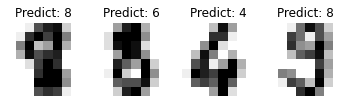

In [24]:
samples = list(zip(digits.images[n//2:], pred))
for id, (img, label) in enumerate(samples[:4]):
    plt.subplot(1, 4, id + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Predict: %i' % label)
plt.show()    